In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
entrenamiento_path = 'dataset/train/'
validacion_path = 'dataset/test/'

img = load_img(validacion_path + 'Airbus A320/3.jpg')

In [3]:
print(img_to_array(img).shape)

(183, 275, 3)


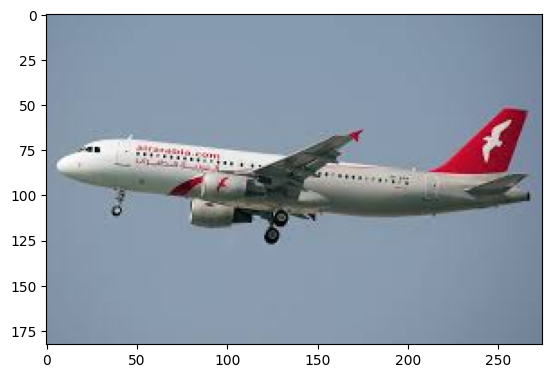

In [4]:
plt.imshow(img)
plt.show()

In [5]:
datos_entrenamiento = ImageDataGenerator().flow_from_directory(entrenamiento_path, target_size = (224, 224))
datos_validacion = ImageDataGenerator().flow_from_directory(validacion_path, target_size = (224, 224))

Found 240 images belonging to 6 classes.
Found 60 images belonging to 6 classes.


In [6]:
numero_aviones = 6

In [7]:
#CONSTRUCCION DEL MODELO
vgg_model = VGG16()

In [8]:
vgg_model_layers = vgg_model.layers
print(vgg_model_layers)

[<InputLayer name=input_layer, built=True>, <Conv2D name=block1_conv1, built=True>, <Conv2D name=block1_conv2, built=True>, <MaxPooling2D name=block1_pool, built=True>, <Conv2D name=block2_conv1, built=True>, <Conv2D name=block2_conv2, built=True>, <MaxPooling2D name=block2_pool, built=True>, <Conv2D name=block3_conv1, built=True>, <Conv2D name=block3_conv2, built=True>, <Conv2D name=block3_conv3, built=True>, <MaxPooling2D name=block3_pool, built=True>, <Conv2D name=block4_conv1, built=True>, <Conv2D name=block4_conv2, built=True>, <Conv2D name=block4_conv3, built=True>, <MaxPooling2D name=block4_pool, built=True>, <Conv2D name=block5_conv1, built=True>, <Conv2D name=block5_conv2, built=True>, <Conv2D name=block5_conv3, built=True>, <MaxPooling2D name=block5_pool, built=True>, <Flatten name=flatten, built=True>, <Dense name=fc1, built=True>, <Dense name=fc2, built=True>, <Dense name=predictions, built=True>]


In [9]:
vgg_model_layersize_used = len(vgg_model_layers) - 1

In [10]:
model = Sequential()
for i in range(vgg_model_layersize_used):
    model.add(vgg_model_layers[i])

In [11]:
for layers in model.layers:
    layers.trainable = False

In [12]:
model.add(Dense(numero_aviones, activation = 'softmax'))
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │        24,582 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,285,126 (512.26 MB)

 Trainable params: 24,582 (96.02 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

None


In [13]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [14]:
batch_size = 4

model.fit(datos_entrenamiento, steps_per_epoch = 60 // batch_size, epochs = 5, validation_data = datos_validacion, validation_steps = 15//batch_size)

Epoch 1/5


c:\Users\rocco\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 8/15 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.1892 - loss: 4.0221

c:\Users\rocco\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


15/15 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.2098 - loss: 3.9503 - val_accuracy: 0.3833 - val_loss: 1.8572
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5501 - loss: 1.3771 - val_accuracy: 0.4167 - val_loss: 2.2290
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.6976 - loss: 0.7935 - val_accuracy: 0.4333 - val_loss: 1.7882
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.8034 - loss: 0.5891 - val_accuracy: 0.3833 - val_loss: 2.2663
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.7743 - loss: 0.5590 - val_accuracy: 0.3667 - val_loss: 2.3760


In [32]:
img = Image.open('B747.jpg').resize((224, 224))

In [33]:
img = np.array(img)

In [44]:
img.shape

(1, 224, 224, 3)

In [35]:
print(img.ndim)

3


In [36]:
img = img.reshape(-1, 224, 224, 3)

In [43]:
print(img.shape)
print(img.ndim)

(1, 224, 224, 3)
4


In [38]:
img  = preprocess_input(img)

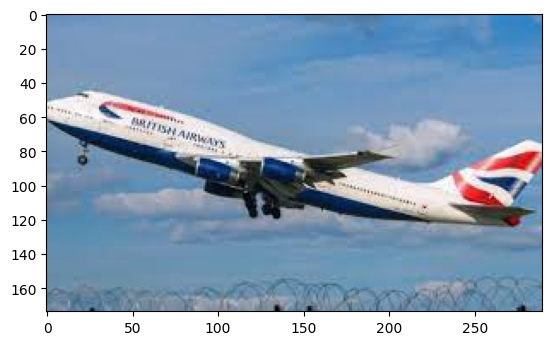

In [45]:
img_for_display = load_img('B747.jpg')
plt.imshow(img_for_display)
plt.show()

In [46]:
#PREDICCION DEL MODELO
predictions = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


In [47]:
predictions

array([[0.20887093, 0.00438348, 0.00780381, 0.20043105, 0.5506143 ,
        0.02789648]], dtype=float32)

In [48]:
image_classes = ['Airbus A320', 'Airbus A380', 'ATR 72', 'Boeing 737 max', 'Boeing 747', 'Boeing 777X']
result = np.argmax(predictions[0])
print(image_classes[result])

Boeing 747
